# Wrangling We Rate Dogs Twitter Data

## Gathering Data

Importing required modules

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import timeit
import json
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

Gathering data from a csv file

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

Programmatically downloading data through requests library

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [4]:
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [5]:
df_img = pd.read_csv(url.split('/')[-1], sep='\t')

Gathering data from Twitter API

In [6]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Storing data from Twitter API in a .txt file

In [8]:
start = timeit.timeit()
print ("hello")
archieved_t_id = []
tweet_json = {}
tweet_json['tweet'] = []  
for t_id in df_twitter['tweet_id']:
    try:
        print("tweet id : " + str(t_id))
        tweet_data = api.get_status(t_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json
        tweet_json['tweet'].append(tweet_data)
    except Exception as e:
        print(str(id)+ " : " + str(e))
        archieved_t_id.append(id)
        
print ("end")
end = timeit.timeit()
print (end-start)
with open('tweet_json.txt', 'a+') as file:
    json.dump(tweet_json, file)

Loading the data from .txt file into a DataFrame

In [6]:
twitter_new_list = []
with open('tweet_json.txt') as json_file:  
    data = json.load(json_file)
    for t in data['tweet']:
        twitter_new_list.append({'tweet_id' : t['id'], 'retweet_count' : t['retweet_count'], 'favorite_count' : t['favorite_count']})

In [7]:
df_twitter_new = pd.DataFrame(twitter_new_list)

## Assessing Data

In [8]:
df_twitter.shape

(2356, 17)

In [9]:
df_twitter_new.shape

(2342, 3)

In [10]:
df_img.shape

(2075, 12)

In [11]:
df_twitter_new.head()

,favorite_count,retweet_count,tweet_id
0,38172,8350,892420643555336193
1,32735,6170,892177421306343426
2,24643,4082,891815181378084864
3,41499,8497,891689557279858688
4,39678,9187,891327558926688256


In [12]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
df_twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [14]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_twitter_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
tweet_id          2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [16]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Further visual assessments were done using google docs

### Quality Issues

### df_twitter

* tweet_id is of type int instead of str
* source column has text content within anchor tag
* timestamp is of type datatype object instead of datetime
* retweeted_status_id and retweeted_status_user_id are of type float instead of string 
* retweeted_status_timestamp is of type datatype object instead of datetime
* in_reply_to_status_id and in_reply_to_user_id are of type float instead of string 
* values other than 10 in rating_denominator
* extreme values of 10 and 1776 in numerator
* Animals other than dogs are also present in the tweets. Many of them are also given ratings

### df_twitter_new

* tweet_id is of type int instead of str
* Rows are lesser than that of df_twitter.Total rows = 2342. No of rows in df_twitter = 2356

### df_img

* tweet_id is of type int instead of str
* img_num is of type instead of category 
* Rows are lesser than that of df_twitter. Total rows = 2075. No of rows in df_twitter = 2356

### Tidyness Issues

* According to the rules of tidy data, df_twitter_new can be merged with twitter archieved dataframe to form a single observational unit
* Dog stages doggo,floofer, puppo, pupper are in seperate columns

## Cleaning Data

Make a copy of dataframes and perform cleaning operations on them

In [19]:
df_twitter_clean = df_twitter.copy()
df_twitter_new_clean = df_twitter_new.copy()
df_img_clean = df_img.copy()

### Change the datatypes of columns with incorrect datatypes

### Define

Use astype() method to convert tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id to type 'str'. Use pd.to_datetime method to convert timestamp fields to datetime type

### Code

In [20]:
df_img_clean['tweet_id'] = df_img_clean['tweet_id'].astype(str)
df_img_clean['img_num'] = df_img_clean['img_num'].astype('category')
df_twitter_new_clean['tweet_id'] = df_twitter_new_clean['tweet_id'].astype(str)
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype(str)
df_twitter_clean['in_reply_to_status_id'] = df_twitter_clean['in_reply_to_status_id'].astype(str)
df_twitter_clean['in_reply_to_user_id'] = df_twitter_clean['in_reply_to_user_id'].astype(str)
df_twitter_clean['retweeted_status_id'] = df_twitter_clean['retweeted_status_id'].astype(str)
df_twitter_clean['retweeted_status_user_id'] = df_twitter_clean['retweeted_status_user_id'].astype(str)
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])
df_twitter_clean['retweeted_status_timestamp'] = pd.to_datetime(df_twitter_clean['retweeted_status_timestamp'])

### Test

In [21]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

In [22]:
df_twitter_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
tweet_id          2342 non-null object
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [23]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


### Source column has text content within anchor tag

### Define

Use beautiful soup to extract text content within anchor tag

### Code

In [24]:
df_twitter_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
source = []

for tag in df_twitter_clean.source:
    markup = tag
    soup = BeautifulSoup(markup, "lxml")
    source.append(soup.get_text())

In [26]:
df_twitter_clean['source'] = source

### Test

In [27]:
df_twitter_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### We only need original tweets. so we can drop retweets and tweets that are replies to other tweets

### Define

Use pandas drop method to drop rows that contain retweets and replies to tweets

### Code

In [28]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

When status_id and user_id columns were converted to type string, the null values were also changed to type str. So replacing null string values(nan) in these columns to NaN

In [29]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
for column in columns:
    df_twitter_clean[column] = df_twitter_clean[column].replace('nan', np.NaN)

In [30]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [31]:
df_twitter_clean[~df_twitter_clean['retweeted_status_id'].isnull()].shape

(181, 17)

In [32]:
df_twitter_clean[~df_twitter_clean['in_reply_to_status_id'].isnull()].shape

(78, 17)

In [33]:
df_twitter_clean = df_twitter_clean[df_twitter_clean['retweeted_status_id'].isnull()]
df_twitter_clean = df_twitter_clean[df_twitter_clean['in_reply_to_status_id'].isnull()]

### Test

In [34]:
df_twitter_clean[~df_twitter_clean['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
df_twitter_clean[~df_twitter_clean['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [36]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](2), 

### Since we have removed the retweets and replies to tweets, we can drop the related columns

### Define

Use pandas drop method to drop the columns - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp  

### Code

In [37]:
df_twitter_clean.shape

(2097, 17)

In [38]:
df_twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1).shape

(2097, 12)

In [39]:
df_twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [40]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### Animals other than dogs are also present in the tweets. Many of them are also given ratings

### Define

Tweets that do not have dog images can be identified using the string 'we only rate dogs' .Use String contains method to identify and drop such columns

### Code

In [41]:
df_twitter_clean[df_twitter_clean['text'].str.contains('we only rate dogs')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
193,855459453768019968,2017-04-21 16:33:22,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
869,761745352076779520,2016-08-06 02:06:59,Twitter for iPhone,Guys.. we only rate dogs. Pls don't send any m...,https://twitter.com/dog_rates/status/761745352...,11,10,None,None,None,None,None
1085,738184450748633089,2016-06-02 01:44:22,Twitter for iPhone,"For the last time, we only rate dogs. Pls stop...",https://twitter.com/dog_rates/status/738184450...,9,10,None,None,None,None,None
1225,714141408463036416,2016-03-27 17:25:54,Twitter for iPhone,"I know we only rate dogs, but since it's Easte...",https://twitter.com/dog_rates/status/714141408...,10,10,None,None,None,None,None
1726,680055455951884288,2015-12-24 16:00:30,TweetDeck,"Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None


In [42]:
df_twitter_clean = df_twitter_clean[~df_twitter_clean['text'].str.contains('we only rate dogs')]

In [43]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2092 non-null object
timestamp             2092 non-null datetime64[ns]
source                2092 non-null object
text                  2092 non-null object
expanded_urls         2089 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  2092 non-null object
doggo                 2092 non-null object
floofer               2092 non-null object
pupper                2092 non-null object
puppo                 2092 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.5+ KB


### Test

In [44]:
df_twitter_clean[df_twitter_clean['text'].str.contains('we only rate dogs')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Dog stages doggo,floofer, puppo, pupper are in seperate columns

### Define

Use String replace and string concat to organise dog stages in a single row

### Code

In [45]:
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in dog_stage:
    df_twitter_clean[stage] = df_twitter_clean[stage].str.replace('None', '')


In [46]:
df_twitter_clean['dog_stage'] = df_twitter_clean['doggo'] + df_twitter_clean['floofer'] + df_twitter_clean['pupper'] + df_twitter_clean['puppo']

In [47]:
df_twitter_clean['dog_stage'].value_counts()

                1756
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

Replacing multiple dog stage entries with 'multiple' stage

In [48]:
df_twitter_clean['dog_stage'] = df_twitter_clean['dog_stage'].str.replace('doggopupper', 'multiple')
df_twitter_clean['dog_stage'] = df_twitter_clean['dog_stage'].str.replace('doggofloofer', 'multiple')
df_twitter_clean['dog_stage'] = df_twitter_clean['dog_stage'].str.replace('doggopuppo', 'multiple')
df_twitter_clean['dog_stage'] = df_twitter_clean['dog_stage'].replace('', np.nan)

In [49]:
df_twitter_clean['dog_stage'].value_counts()

pupper      221
doggo        72
puppo        23
multiple     11
floofer       9
Name: dog_stage, dtype: int64

Dropping the columns that contain indivijual dog stages

In [50]:
df_twitter_clean.shape

(2092, 13)

In [51]:
df_twitter_clean.drop(['doggo', 'pupper', 'puppo', 'floofer'], axis = 1, inplace = True)

In [52]:
df_twitter_clean['dog_stage'] = df_twitter_clean['dog_stage'].replace('', np.NaN)

### Test

In [53]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2092 non-null object
timestamp             2092 non-null datetime64[ns]
source                2092 non-null object
text                  2092 non-null object
expanded_urls         2089 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  2092 non-null object
dog_stage             336 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.4+ KB


In [54]:
df_twitter_clean['dog_stage'].sample(10)

1297       NaN
2152       NaN
848        NaN
1347       NaN
203        NaN
367        NaN
1981    pupper
1034       NaN
1898       NaN
1212       NaN
Name: dog_stage, dtype: object

In [55]:
df_twitter_clean[df_twitter_clean['text'].str.contains('doggopuppo')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [56]:
df_twitter_clean[df_twitter_clean['text'].str.contains('doggofloofer')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [57]:
df_twitter_clean[df_twitter_clean['text'].str.contains('doggopuppo')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Merging df_twitter_new with df_twitter as they can be grouped as one observational unit


Also we have a completeness quality issue in df_twitter_new as it has less number of rows compared the df_twitter dataframe. But after cleaning process, the cleaned twitter data has lesser number of rows than the additonally collected data. So, we are merging only the common rows from both dataframes

### Define

Join the dataframes on tweet_id. Retain only those records that are present in all both dataframes and drop the rest. Use Pandas Merge to join the dataframes

### Code

In [58]:
df_twitter_clean = df_twitter_clean.merge(df_twitter_new_clean, on = 'tweet_id')

### Test

In [59]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 11 columns):
tweet_id              2091 non-null object
timestamp             2091 non-null datetime64[ns]
source                2091 non-null object
text                  2091 non-null object
expanded_urls         2088 non-null object
rating_numerator      2091 non-null int64
rating_denominator    2091 non-null int64
name                  2091 non-null object
dog_stage             336 non-null object
favorite_count        2091 non-null int64
retweet_count         2091 non-null int64
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 196.0+ KB


### Values other than 10 are present in rating_denominator

### Define

Inspect tweets that have denominator other than 10 and correct them

### Code

In [60]:
df_incorrect_denominators = df_twitter_clean[df_twitter_clean['rating_denominator'] != 10]

In [61]:
for i in df_incorrect_denominators.index:
    print(str(i) + ' ' + df_twitter_clean.iloc[i,:].text + ' ' + str(df_twitter_clean.iloc[i,:].rating_denominator))

338 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd 70
402 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 7
698 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE 150
850 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ 11
900 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv 170
944 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 20
981 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 50
1006 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1 90
1031 Here's a brigade of puppers. All look very prepare

Few ratings are incorrect as there were multiple '/' in the tweet text.

In [62]:
df_twitter_clean.loc[402,'rating_denominator'] = np.NaN
df_twitter_clean.loc[402,'rating_numerator'] = np.NaN
df_twitter_clean.loc[850,'rating_denominator'] = 10
df_twitter_clean.loc[850,'rating_numerator'] = 14
df_twitter_clean.loc[944,'rating_denominator'] = 10
df_twitter_clean.loc[944,'rating_numerator'] = 13
df_twitter_clean.loc[981,'rating_denominator'] = 10
df_twitter_clean.loc[981,'rating_numerator'] = 11
df_twitter_clean.loc[1421,'rating_denominator'] = 10
df_twitter_clean.loc[1421,'rating_numerator'] = 10
df_twitter_clean.loc[2070,'rating_denominator'] = 10
df_twitter_clean.loc[2070,'rating_numerator'] = 9

In [63]:
df_incorrect_denominators = df_incorrect_denominators.drop([402, 850, 944, 981, 1421, 2070])

In [64]:
df_incorrect_denominators.index

Int64Index([338, 698, 900, 1006, 1031, 1051, 1124, 1205, 1394, 1534, 1596], dtype='int64')

Some ratings were given for a group of dogs. Hence normalizing the ratings.

In [65]:
for i in df_incorrect_denominators.index:
    factor = df_twitter_clean.loc[i,'rating_denominator']/10
    df_twitter_clean.loc[i,'rating_denominator'] = df_twitter_clean.loc[i,'rating_denominator']/factor
    df_twitter_clean.loc[i,'rating_numerator'] = df_twitter_clean.loc[i,'rating_numerator']/factor

In [66]:
df_twitter_clean[~df_twitter_clean['rating_denominator'].isnull()].shape

(2090, 11)

In [67]:
df_twitter_clean = df_twitter_clean[~df_twitter_clean['rating_denominator'].isnull()]

### Test

In [68]:
df_twitter_clean[df_twitter_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count


In [69]:
for i in df_incorrect_denominators.index:
    print('numerator : ' + str(df_twitter_clean.loc[i,'rating_numerator']))
    print('denominator : ' + str(df_twitter_clean.loc[i,'rating_denominator']))

numerator : 12.0
denominator : 10.0
numerator : 11.0
denominator : 10.0
numerator : 12.0
denominator : 10.0
numerator : 11.0
denominator : 10.0
numerator : 10.0
denominator : 10.0
numerator : 9.0
denominator : 10.0
numerator : 12.0
denominator : 10.0
numerator : 11.0
denominator : 10.0
numerator : 11.0
denominator : 10.0
numerator : 12.0
denominator : 10.0
numerator : 11.0
denominator : 10.0


In [70]:
df_twitter_clean['rating_denominator'].describe()

count    2090.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

### Numerator has extreme ratings from 0 to 1776

### Code

In [71]:
df_twitter_clean['rating_numerator'].describe()

count    2090.000000
mean       11.697129
std        39.721561
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [72]:
df_twitter_clean[df_twitter_clean['rating_numerator'] > 20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
527,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,NaN,19510,6700
585,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,pupper,7004,1776
767,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,NaN,5407,2644
1469,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,NaN,1800,518
1815,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,NaN,25037,9016


In [73]:
for x in df_twitter_clean[df_twitter_clean['rating_numerator'] > 15].text:
    print(x)

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [74]:
df_twitter_clean[df_twitter_clean['rating_numerator'] > 15].index

Int64Index([527, 585, 767, 1469, 1815], dtype='int64')

In [75]:
df_twitter_clean.loc[527,'rating_numerator'] = round(9.75)
df_twitter_clean.loc[585,'rating_numerator'] = round(11.27)
df_twitter_clean.loc[1469,'rating_numerator'] = round(11.26)

In [76]:
df_twitter_clean[df_twitter_clean['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
245,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0.0,10.0,None,NaN,23650,3253


In [77]:
df_twitter_clean.loc[245,'text']

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [78]:
df_twitter_clean[df_twitter_clean['rating_numerator'] != 0].shape

(2089, 11)

In [79]:
df_twitter_clean = df_twitter_clean[df_twitter_clean['rating_numerator'] != 0]

### Test

In [80]:
df_twitter_clean[df_twitter_clean['rating_numerator'] > 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
767,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,NaN,5407,2644
1815,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,NaN,25037,9016


In [81]:
df_twitter_clean.shape

(2089, 11)

Merging the cleaned twitter dataframe and cleaned image predictions datafame in a single master dataframe

In [82]:
df_twitter_master = df_twitter_clean.merge(df_img_clean, on = 'tweet_id')

In [83]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 22 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null float64
rating_denominator    1963 non-null float64
name                  1963 non-null object
dog_stage             303 non-null object
favorite_count        1963 non-null int64
retweet_count         1963 non-null int64
jpg_url               1963 non-null object
img_num               1963 non-null category
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3                    1963 non-null object
p3_conf               1963

In [84]:
df_twitter_master.to_csv('twitter_archive_master.csv', index=False)

# Analysing the cleaned master data

Loading the cleaned master file into a dataframe. 

In [85]:
df_twitter_master = pd.read_csv('twitter_archive_master.csv', dtype={'tweet_id':str,'img_num':'category'},
                                                              parse_dates=['timestamp'])

In [86]:
df_twitter_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,38172,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,32735,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,24643,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [87]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 22 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null float64
rating_denominator    1963 non-null float64
name                  1963 non-null object
dog_stage             303 non-null object
favorite_count        1963 non-null int64
retweet_count         1963 non-null int64
jpg_url               1963 non-null object
img_num               1963 non-null category
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3                    1963 non-null object
p3_conf               1963

### How are favourites count distributed?

In [88]:
def plot_label(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()

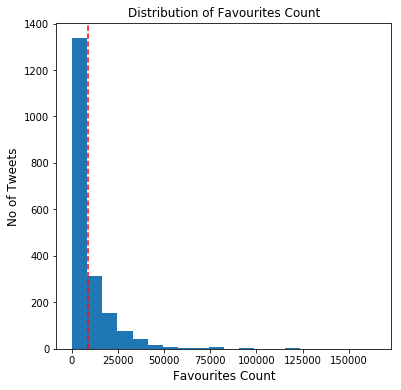

Favorites_count mean : 8801.10494142


In [89]:
df_twitter_master['favorite_count'].plot(kind='hist', figsize=(6,6), bins = 20)
plt.axvline(df_twitter_master['favorite_count'].mean(), color='red', linestyle='dashed')
plot_label('Distribution of Favourites Count','Favourites Count','No of Tweets' )
print('Favorites_count mean : ' + str(df_twitter_master['favorite_count'].mean()))

Looks like the Favouries count is skewed towards the right with a mean of 8801.1

### How are Retweets count distributed?

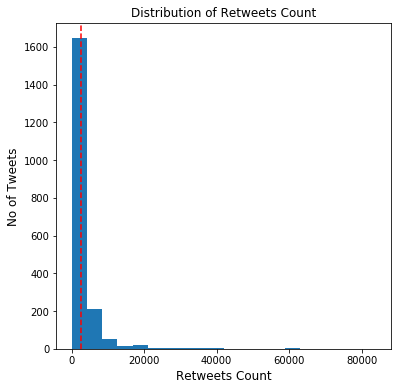

Retweets_count mean : 2679.28578706


In [90]:
df_twitter_master['retweet_count'].plot(kind='hist', figsize=(6,6), bins = 20)
plt.axvline(df_twitter_master['retweet_count'].mean(), color='red', linestyle='dashed')
plot_label('Distribution of Retweets Count','Retweets Count','No of Tweets' )
print('Retweets_count mean : ' + str(df_twitter_master['retweet_count'].mean()))

Looks like the Retweets count is also skewed towards the right with a mean of 2679.1

### How are Dog Ratings distributed?

Dropping the outliers in dog rating

In [91]:
df_twitter_master[df_twitter_master['rating_numerator'] > 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
717,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,NaN,5407,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
1688,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,NaN,25037,...,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False


In [92]:
df_twitter_master = df_twitter_master[df_twitter_master['rating_numerator'] <= 15]

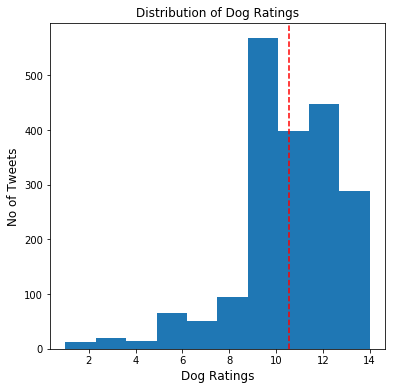

Dog Ratings mean : 10.548699643


In [93]:
df_twitter_master['rating_numerator'].plot(kind='hist', figsize=(6,6), bins = 10)
plt.axvline(df_twitter_master['rating_numerator'].mean(), color='red', linestyle='dashed')
plot_label('Distribution of Dog Ratings','Dog Ratings','No of Tweets' )
print('Dog Ratings mean : ' + str(df_twitter_master['rating_numerator'].mean()))

Dogs Ratings appear to be left skewed with a mean of 10.5

### Are Favorited tweets, also been retweeted?

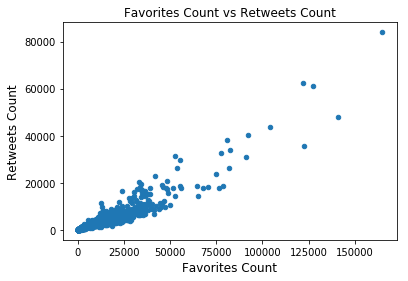

In [94]:
df_twitter_master.plot(kind='scatter', x='favorite_count', y='retweet_count')
plot_label('Favorites Count vs Retweets Count', 'Favorites Count', 'Retweets Count')

In [95]:
df_twitter_master['favorite_count'].corr(df_twitter_master['retweet_count'])

0.92994201264419718

There seems to be a strong positive correlation between favourites count and retweet count. Hence we can conclude that most of the dog rating tweets that are favourited were also retweeted.

### Are tweets with better dog rating been favourited more relatively?

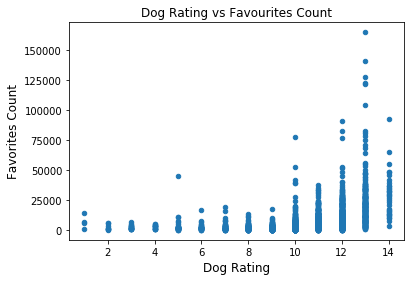

In [96]:
df_twitter_master.plot(kind='scatter', x='rating_numerator', y='favorite_count')
plot_label('Dog Rating vs Favourites Count','Dog Rating' , 'Favorites Count')

In [97]:
df_twitter_master['rating_numerator'].corr(df_twitter_master['favorite_count'])

0.3959974907385595

There seems to be a weak positive linear relationship between dog ratings and favourites count. Hence we cannot infer that tweets with better dog ratings have relatively more favourite counts

### Are tweets with better dog rating been retweeted more relatively?

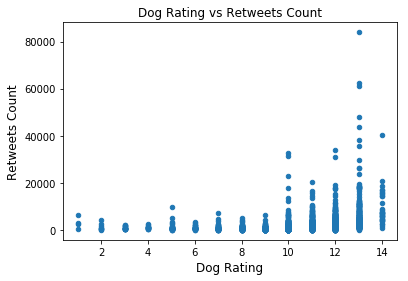

In [98]:
df_twitter_master.plot(kind='scatter', x='rating_numerator', y='retweet_count')
plot_label('Dog Rating vs Retweets Count','Dog Rating' , 'Retweets Count')

In [99]:
df_twitter_master['rating_numerator'].corr(df_twitter_master['retweet_count'])

0.29830824918197318

There seems to be a weak positive linear relationship between dog ratings and retweets count. Hence we cannot infer that tweets with better dog ratings have relatively more retweets counts.

### On average, Dogs in which state got better ratings?

For analysis based on dog stage, we are considering only those tweets that have a dog stage entry.

In [100]:
df_twitter_master[~df_twitter_master['dog_stage'].isnull()].shape

(303, 22)

In [101]:
df_twitter_dog_ratings = df_twitter_master[~df_twitter_master['dog_stage'].isnull()]

In [102]:
def plot_bar(df, category, column_name, title, xlabel, ylabel):
    df.groupby(category)[column_name].mean().plot(kind='bar', rot=30)
    plot_label(title, xlabel, ylabel)
    plt.show()

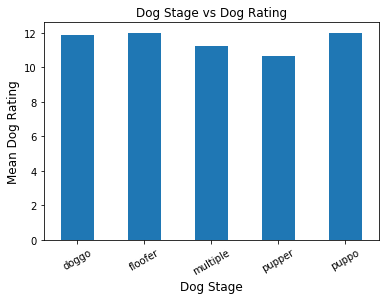

In [103]:
plot_bar(df_twitter_dog_ratings, 'dog_stage','rating_numerator', 'Dog Stage vs Dog Rating', 'Dog Stage', 'Mean Dog Rating' )

Dogs of stage 'pupper' have got the least average ratings and the average ratings of doggo, floofer and pupper aren't significantly different to arrive at a conclusion.

### On average, Dogs in which state were favourited more?

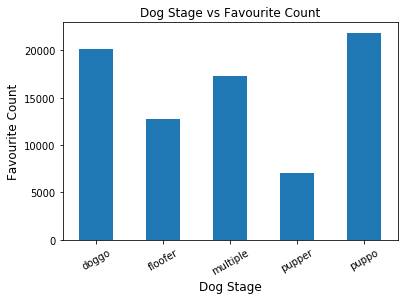

In [104]:
plot_bar(df_twitter_dog_ratings, 'dog_stage','favorite_count', 'Dog Stage vs Favourite Count', 'Dog Stage', 'Favourite Count' )

Looks like the puppo's are most favourited dogs while the pupper's are the least favourited.

### On average, Dogs in which state were retweeted more?

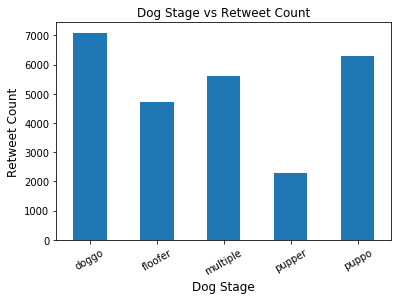

In [105]:
plot_bar(df_twitter_dog_ratings, 'dog_stage','retweet_count', 'Dog Stage vs Retweet Count', 'Dog Stage', 'Retweet Count' )

Looks like the doggo's received the highest retweets while the pupper's are the least retweeted.

## Conclusion

From the limited dog stages data available and based on the dog ratings, retweet and favourite counts, it can be seen that people those who have responded to these tweets like puppo's and doggo's relatively more and pupper's were the least favourite.